In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy import interpolate
from COVID import *
import sys
sys.path.append("..")
sys.path.append('../Viterbi')
from SlidingWindow import *
from Viterbi import getCSM
from Savewave import* 

In [2]:
#https://www.worldometers.info/world-population/us-population/
#https://www.worldometers.info/world-population/italy-population/
#https://www.worldometers.info/world-population/france-population/
#https://www.worldometers.info/world-population/spain-population/
#https://www.worldometers.info/world-population/uk-population/

In [3]:
#covid data from january 20th to july 10th 2020
USCode = "US"
USPop = 329064917
ESCode = "ES"
ESPop = 46755639
ITCode = "IT"
ITPop = 60457602
GBCode = "GB"
GBPop = 67903100
FRCode = "FR"
FRPop = 65280404

#Audio length to interpolate to 
fs = 44100
seconds = 15
DesiredAudioFrame = np.linspace(0, seconds, int(fs*seconds))

#creates chords to be used for amplitude modulation
freq = 440
csize = 9
Chords = make_chord_arrays(seconds,freq,csize)
rcsize = int(np.sqrt(csize))

In [ ]:
#covid data from january 20th to july 10th 2020
Datamatrix = get_data(ITCode)
#get deaths and cases from each country
C,D = get_info(Datamatrix) 

#interpolate the arrays to desired audio length
IC,ID = get_interp(C,D,DesiredAudioFrame)

#create 2D arrays from cases/deaths 
Data = create_2D_shape(IC,ID)

#get new max for cases and deaths
ncmax, ndmax = get_country_max(Data)

#scales data down to [0,1] interval on both x,y axis
Data = scale_data(Data,ncmax,ndmax)

#gets max values in each column of countries data matrix
cmax,dmax = get_country_max(Data)

#create earcons
Earcons = create_earcons(cmax,dmax,rcsize)

#create audio
modamp = 2
Audio = create_audio(Data,Earcons,Chords,modamp)

#scale up  data/earcons for graph
GData = scale_data(Data,ncmax,ndmax,False)
GEarcons = scale_data(Earcons,ncmax,ndmax,False)
make_data_earcon_plot(GData,GEarcons,ITCode,DesiredAudioFrame)


#make population % graph earcon plot
PData = scale_data(GData,ITPop,ITPop)
PEarcons = scale_data(GEarcons,ITPop,ITPop)
make_data_earcon_population_plot(PData,PEarcons,ITCode,DesiredAudioFrame)

#create animate array
animateg = np.append(PEarcons,PData,axis=0)

#animate Data
#CurveAnimator(animateg,"COVIDEarconsIT.mp4","Cases Per Day (% of Pop)","Deaths Per Day (% of Pop)", fps=150, title='COVID Earcons IT')

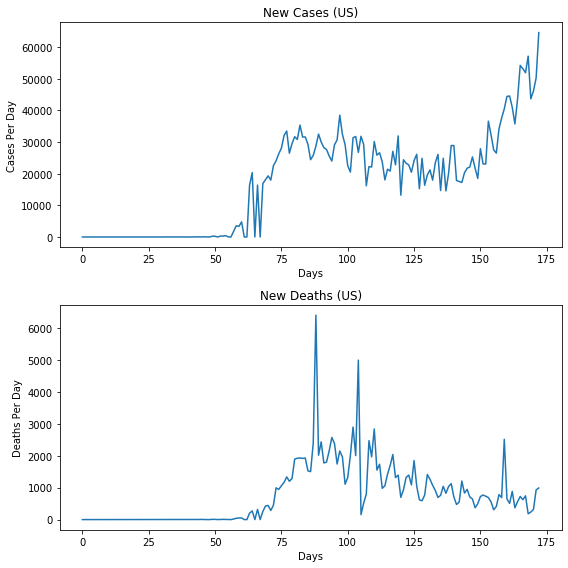

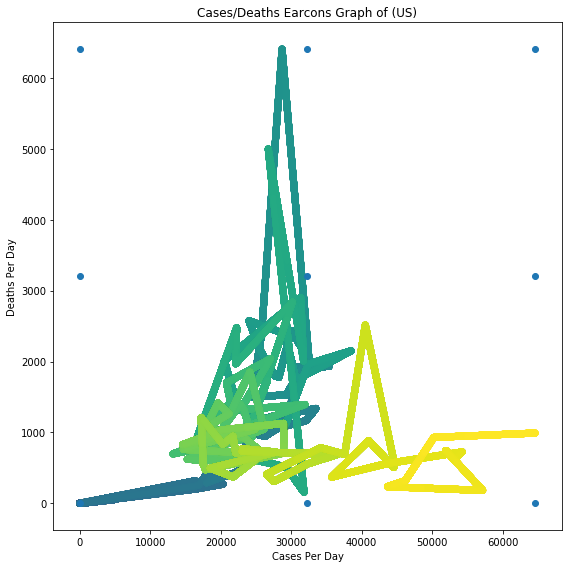

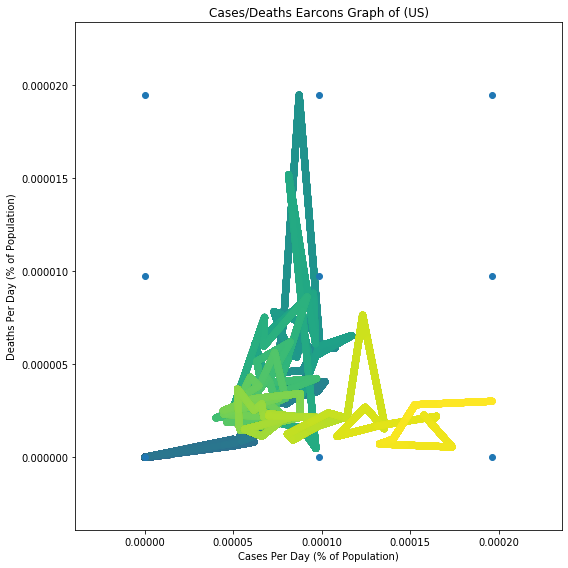

In [4]:
USAudio = do_covid_calc(USCode,DesiredAudioFrame,Chords,rcsize,USPop)

In [ ]:
ESAudio = do_covid_calc(ESCode,DesiredAudioFrame,Chords,rcsize,ESPop) 

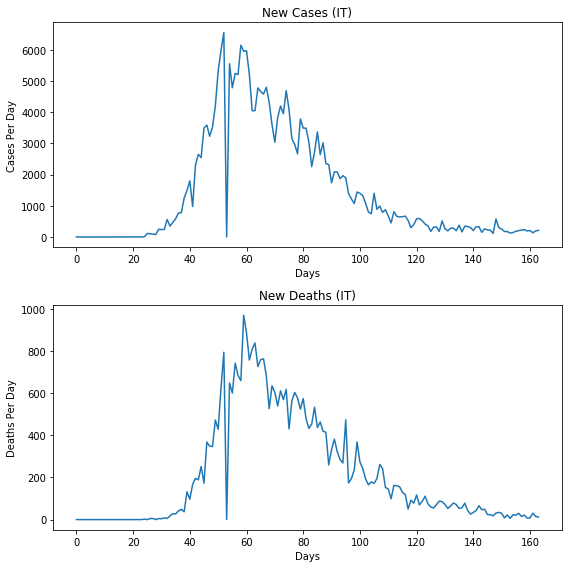

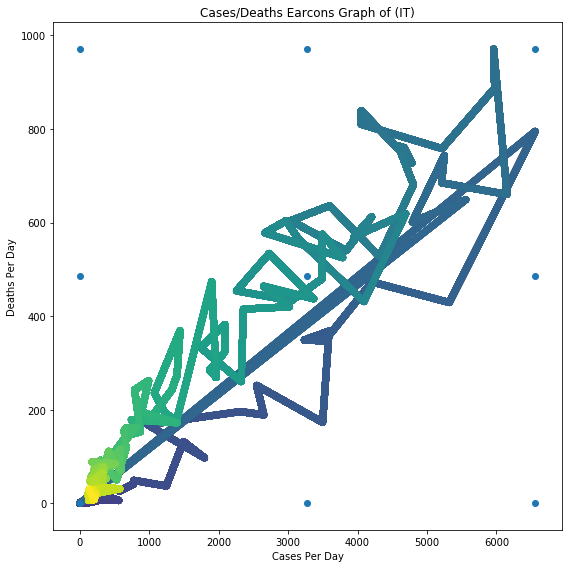

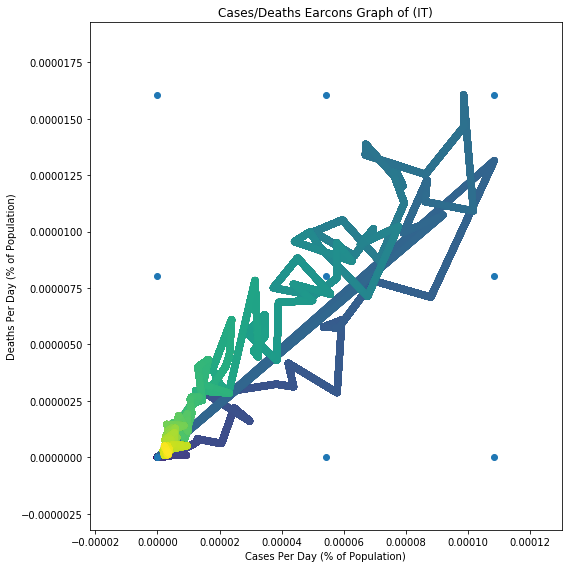

In [6]:
ITAudio = do_covid_calc(ITCode,DesiredAudioFrame,Chords,rcsize,ITPop)

In [ ]:
GBAudio = do_covid_calc(GBCode,DesiredAudioFrame,Chords,rcsize,GBPop)

In [ ]:
FRAudio = do_covid_calc(FRCode,DesiredAudioFrame,Chords,rcsize,FRPop)

In [5]:
ipd.Audio(USAudio, rate=fs)

In [ ]:
ipd.Audio(ESAudio, rate=fs)

In [7]:
ipd.Audio(ITAudio, rate=fs)

In [ ]:
ipd.Audio(GBAudio, rate=fs)

In [ ]:
ipd.Audio(FRAudio, rate=fs)

In [ ]:
save_wavfile("USCOVID.wav", fs, USAudio)

In [ ]:
save_wavfile("ITAudio.wav", fs, ITAudio)

In [ ]:
ipd.Audio([USAudio,ITAudio], rate=fs)

In [ ]:
ipd.Audio(Audio, rate=fs)